# ***Szkolenie ML/AI 4***
### ***Sztuczne sieci neuronowe - klasyfikacja***

<div style="text-align: right;">
<small>Made by Aleksander Kołodziejczyk</small>
</div>


#!pip install -r requirements.txt


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# 1. Załadowanie zbioru danych irysów
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [33]:
# 2. Wstępne przetwarzanie danych
# Normalizacja cech (standaryzacja)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konwersja etykiet do formatu One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)

y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.3, random_state=42)

In [34]:
X_train.shape

(105, 4)

In [35]:
y_train.shape

(105, 3)

In [36]:
# # 3. Budowa modelu sieci neuronowej
# model = Sequential([
#     Dense(8, input_dim=4, activation='relu'),   # Warstwa wejściowa + 1 warstwa ukryta
#     Dense(3, activation='softmax')              # Warstwa wyjściowa z funkcją aktywacji softmax
# ])

In [37]:
# 3. Budowa rozbudowanego modelu sieci neuronowej
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),      # Pierwsza warstwa ukryta z 16 neuronami
    BatchNormalization(),                          # Normalizacja wsadowa
    Dropout(0.2),                                   # Dropout z 20% prawdopodobieństwem
    
    Dense(32, activation='relu'),                   # Druga warstwa ukryta z 32 neuronami
    BatchNormalization(),                          # Normalizacja wsadowa
    Dropout(0.3),                                   # Dropout z 30% prawdopodobieństwem
    
    Dense(16, activation='relu'),                   # Trzecia warstwa ukryta z 16 neuronami
    BatchNormalization(),                          # Normalizacja wsadowa
    Dropout(0.2),                                   # Dropout z 20% prawdopodobieństwem
    
    Dense(3, activation='softmax')                  # Warstwa wyjściowa z funkcją aktywacji softmax
])

/home/aleksander.kolodziej@A4BEE.ad/Desktop/lab--AI-ML--szkolenie--olson/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# 4. Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Wyświetlenie struktury modelu
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,459 (5.70 KB)

 Trainable params: 1,331 (5.20 KB)

 Non-trainable params: 128 (512.00 B)

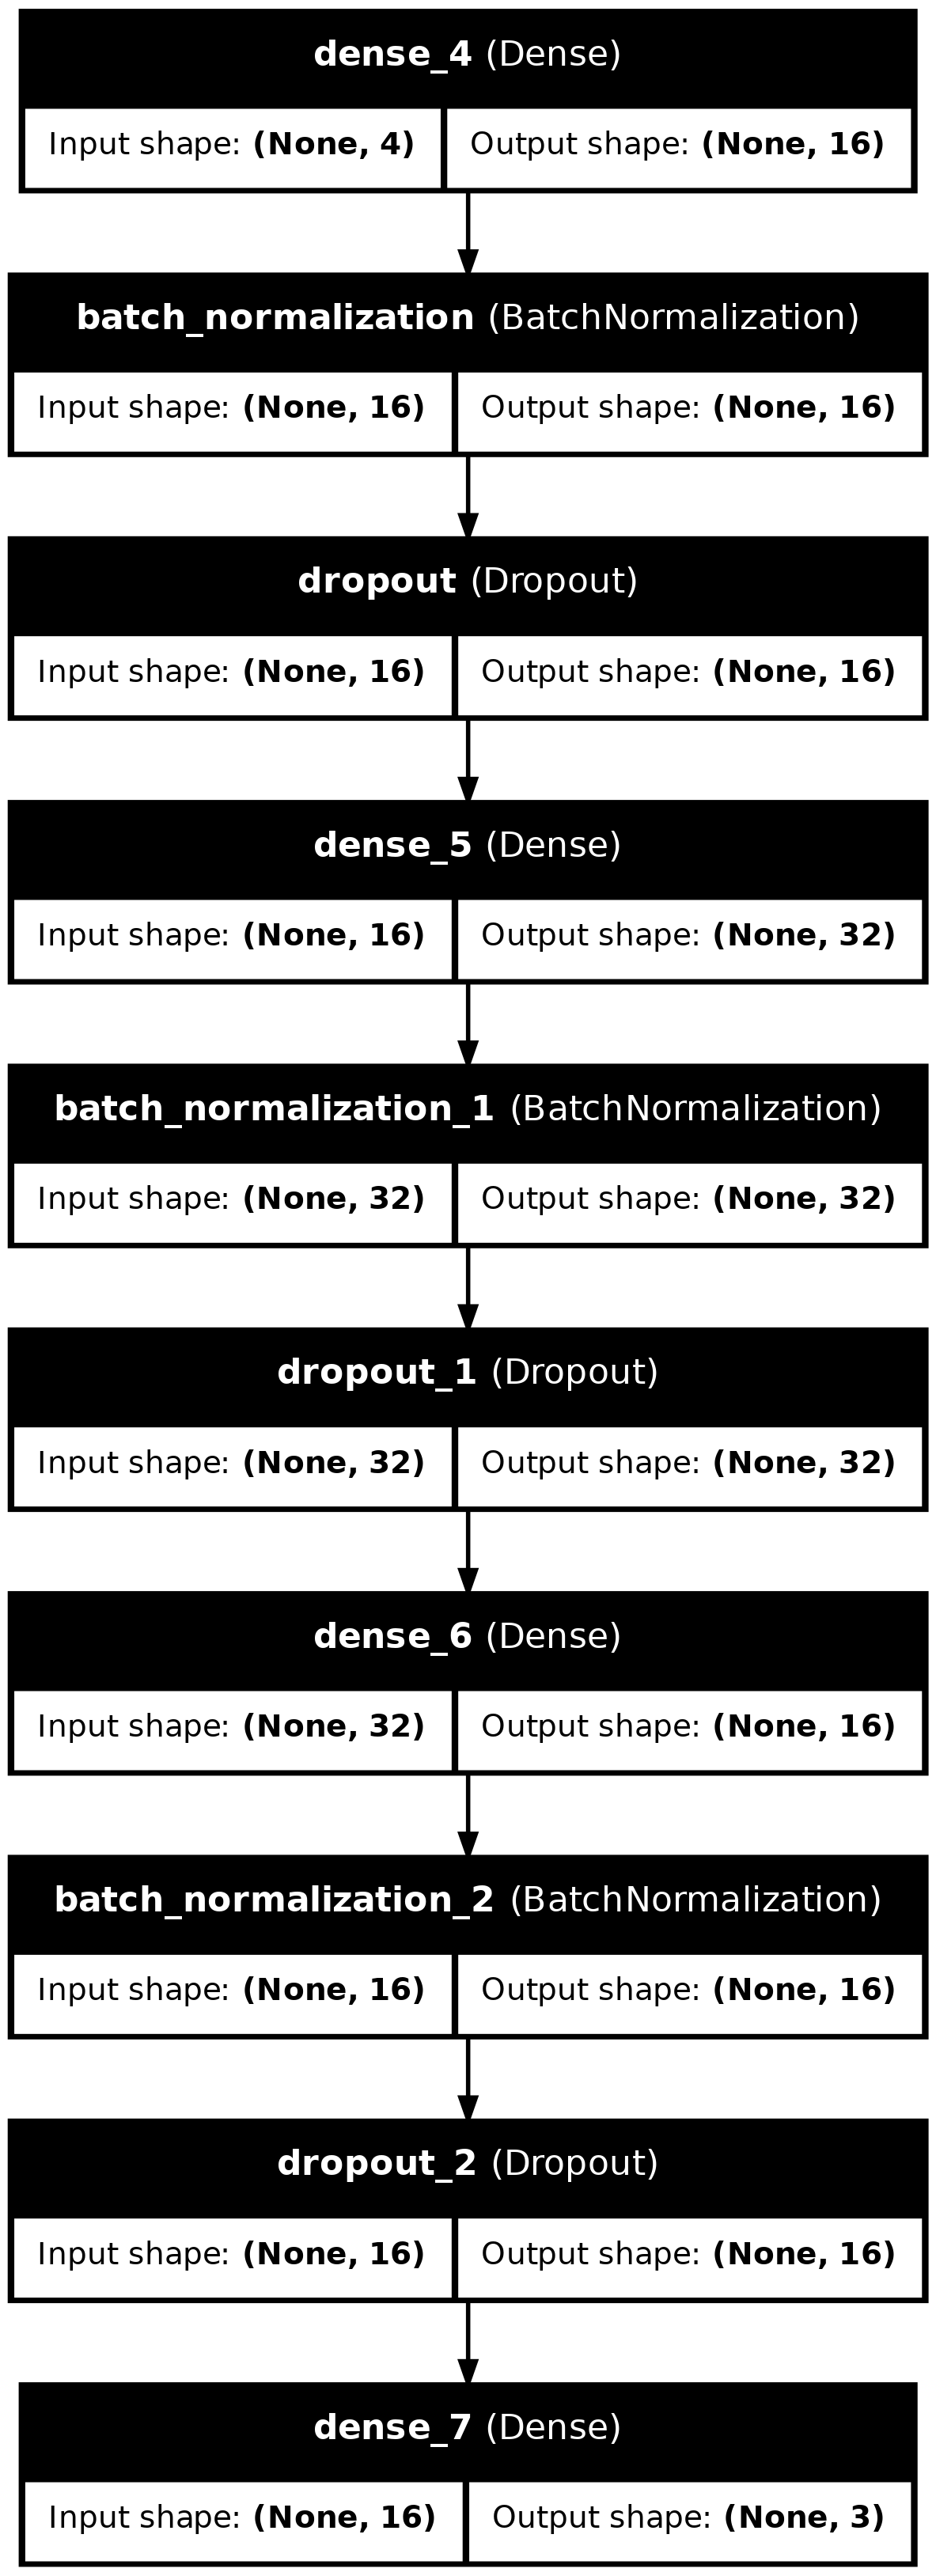

In [40]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [41]:
# 5. Trenowanie modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=300, 
                    batch_size=15, 
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/300


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4080 - loss: 1.8196 - val_accuracy: 0.5556 - val_loss: 1.0128
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4188 - loss: 1.3977 - val_accuracy: 0.6444 - val_loss: 0.9925
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4343 - loss: 1.4227 - val_accuracy: 0.6667 - val_loss: 0.9622
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7170 - loss: 0.8995 - val_accuracy: 0.6889 - val_loss: 0.9308
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5672 - loss: 0.9242 - val_accuracy: 0.6889 - val_loss: 0.9025
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6189 - loss: 0.8298 - val_accuracy: 0.7556 - val_loss: 0.8738
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6425 - loss: 0.8635 - val_accuracy: 0.7333 - val_loss: 0.8435
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7347 - loss: 0.6435 - val_accuracy: 0.7778 - val_loss: 0.8153
Epoch 9/300

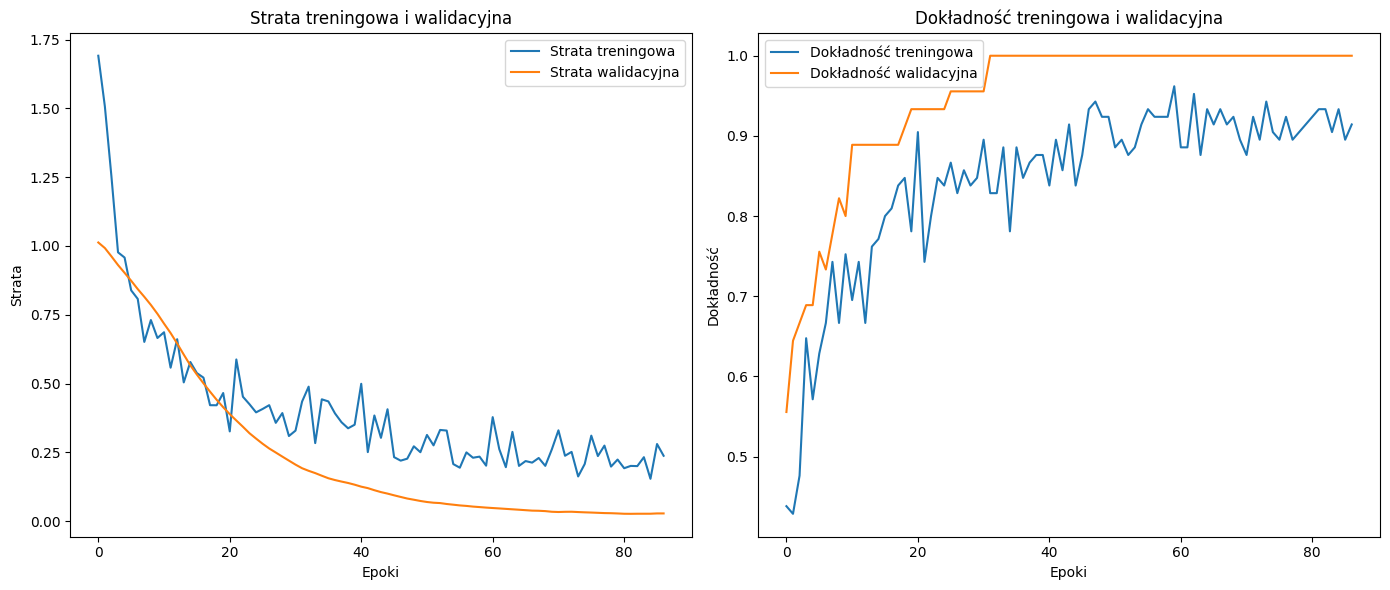

In [42]:
# 6. Wizualizacja wyników

# Wykres strat treningowych i walidacyjnych
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.title('Strata treningowa i walidacyjna')

# Wykres dokładności treningowej i walidacyjnej
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Dokładność treningowa i walidacyjna')

plt.tight_layout()
plt.show()

In [43]:
# 7. Ocena modelu
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=10)
print(f'Dokładność modelu na zbiorze testowym: {test_accuracy:.2f}')

Dokładność modelu na zbiorze testowym: 1.00


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7c3d141869e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


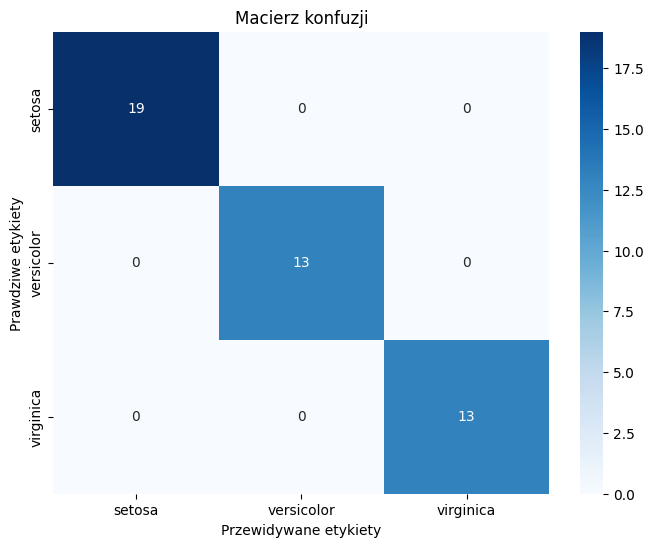

In [44]:
# 8. Macierz konfuzji
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Przewidywanie klas na zbiorze testowym
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Obliczanie macierzy konfuzji
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz konfuzji')
plt.show()
